### Generate data from Gaussian disttributions
- Let us have the case where the class probabilities $P_1, P_2, p_1(x),p_2(x)$ are known.
- Assume that $p_i(x) = N(\mu_i,\Sigma_i)$ and $x$ is m-dimensional.
- Develop a Bayesian decision function that can differentiate the two classes.(The boundary equation may be derived on paper and used to write the program. This avoids the usage of exponent operations )
- The data to test the algorithm has to be generated. The following snippet generates one dimensional data belonging to two classes with the given probabilities.

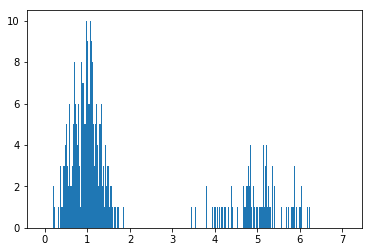

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def generatedata(P1,mu1,Sigma1,mu2,Sigma2,N):
    Y = np.zeros(N)
    t = np.random.uniform(0,1,N)
    Y[t<=P1] = 1
    N1 = int(np.sum(Y))
    X = np.zeros(N)
    X[Y == 1] = np.sqrt(Sigma1)*np.random.randn(N1) + mu1
    X[Y == 0] = np.sqrt(Sigma2)*np.random.randn(N - N1) + mu2
    return X,Y
P1 = 0.7
P2 = 1 - P1
Sigma1 = 0.1
Sigma2 = 0.5
mu1 = 1
mu2 = 5
N = 1000
X,Y = generatedata(P1,mu1,Sigma1,mu2,Sigma2,N)

plt.hist(X, bins = 1000)
plt.show()

#### Assignment 1
- Extend the function above to generate multidimensional (dimension = $m$) data when $P_1, P_2, \mu_1, \mu_2, \Sigma_1, \Sigma_2$ are given. (*Hint use np.random.multivariate_normal*)
- Generate 1000 samples of 2-dimensional data using the function above and scatter plot it to see the spatial distribution?(*use matplotlib.pyplot.scatter*) The parameter values are $P_1 = 0.6; \mu_1 = (0,0); \mu_2 = (2,2);$ $ \Sigma_1 =  \begin{bmatrix} 0.1 & 0 \\ 0 & 0.4 \end{bmatrix}; \Sigma_1 =  \begin{bmatrix} 0.2 & 0 \\ 0 & 0.6 \end{bmatrix} $


- Find the polynomial equation for the discriminating boundary between the two classes.
- Write a function bayesClassifier that accepts a data observation and returns the class label

In [4]:
''' Input : x = data vector 
    Return Value : Preddicted class label'''
def bayesClassifier(x,):
    '''fill in the details'''

- Use this function to label the generated 100 observations.
- Compute the classification accuracy. ( $\frac{Number\; of \;Samples\; Correctly\; classified \times 100}{Total\; Number\; of\; Samples}$)
- plot the data observations, the two regions correspoing to the two classes and the decision boundary together on the same plot.

correct observations out of 100 :  100 accuracy:  100.0
[[-0.87101238 -0.86679729 -0.8625822  ...,  3.3314286   3.33564368
   3.33985877]
 [-0.87101238 -0.86679729 -0.8625822  ...,  3.3314286   3.33564368
   3.33985877]
 [-0.87101238 -0.86679729 -0.8625822  ...,  3.3314286   3.33564368
   3.33985877]
 ..., 
 [-0.87101238 -0.86679729 -0.8625822  ...,  3.3314286   3.33564368
   3.33985877]
 [-0.87101238 -0.86679729 -0.8625822  ...,  3.3314286   3.33564368
   3.33985877]
 [-0.87101238 -0.86679729 -0.8625822  ...,  3.3314286   3.33564368
   3.33985877]]


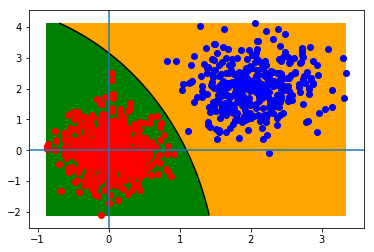

In [3]:
import numpy as np
import matplotlib.pyplot as plt
#############################################################################
#function to generate test data
def generatedata(P1, mu1, Sigma1, mu2, Sigma2, N):
    Y = np.zeros(N)
    t = np.random.uniform(0, 1, N) #uniform distribution between 0 - 1
    Y[t<=P1] = 1 # assign the class lables to N*P1 elements
    N1 = int(np.sum(Y)) #get count of all y==1 elements
    X = np.zeros((N,2)) # x 2-d array
    X[Y == 1] = np.random.multivariate_normal(mu1, Sigma1, N1)
    X[Y == 0] = np.random.multivariate_normal(mu2, Sigma2, N-N1) 
    return X,Y
#############################################################################
#bayesian classifier function
def bayesClassifier(x, y):
    #boundary condition: 2.5x^2+0.37y^2+10x+3.25y-13.952
    val = (2.5*x**2)+(0.37*y**2)+(10*x)+(3.25*y)-13.952 
    if(val < 0):
        return 1
    else:
        return 0
#############################################################################
def main():
    ##################################################################
    #parameters
    P1 = 0.6
    Sigma1 = [[0.1, 0], 
              [0, 0.4]]
    Sigma2 = [[0.2, 0], 
              [0, 0.6]]
    mu1 = [0, 0]
    mu2 = [2, 2]
    #observation count
    N = 1000
    #generate test data
    x, y = generatedata(P1, mu1, Sigma1, mu2, Sigma2, N)
    ##################################################################
    #test 100 observation
    testN = 100
    correct = 0
    Z = np.zeros(testN) 
    #testing function
    for i in range(0, Z.shape[0]):
        Z[i] = bayesClassifier(x[i][0], x[i][1]) #test for class
        if(Z[i] == y[i]): #check for match
            correct += 1

    accuracy = (correct * 100)/testN
    print("correct observations out of "+str(testN)+" : ", 
          correct, "accuracy: ", accuracy)
    ##################################################################
    #create mesh grid for boundary
    xl = np.linspace(np.amin(x, axis=0)[0], np.amax(x, axis=0)[0], 1000)
    yl = np.linspace(np.amin(x, axis=0)[1], np.amax(x, axis=0)[1], 1000)
    X,Y = np.meshgrid(xl,yl)
    z = (2.5*X**2)+(0.37*Y**2)+(10*X)+(3.25*Y)-13.952 #solving for meshgrid
    zl = np.zeros_like(z, dtype = int) #get array of zeros of z.shape
    #evaluate boundary line
    zl[z>0] = 1;
    zl[z<0] = -1
    ##################################################################
    #plot boundary condition curve
    cp = plt.contour(X, Y, z, levels = [0], colors = ('black'))
    plt.contourf(X, Y, zl, colors=('g','orange'))
    ##################################################################
    #plot x with both classes
    plt.scatter(x[y==1][:,0], x[y==1][:, 1], color="red")
    plt.scatter(x[y==0][:,0], x[y==0][:, 1], color="blue")
    plt.axvline(x=0)
    plt.axhline(y=0)
    plt.show()    
    return
##################################################################################
main() #start program